# Audit Analytics Workbench
## Risk-Based Transaction Testing & Continuous Control Monitoring

### Objective
To demonstrate how analytics enhances audit efficiency by applying full-population risk-based testing to financial transactions in a fintech environment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("accounting_dataset.csv")

df.head()

,Transaction_ID,Date,Account_Number,Transaction_Type,Amount,Currency,Counterparty,Category,Payment_Method,Risk_Incident,Risk_Type,Incident_Severity,Error_Code,User_ID,System_Latency,Login_Frequency,Failed_Attempts,IP_Region
0,TXN00001,2024-08-18,250637,Refund,952.11,USD,Garcia-Gordon,Payroll,Cash,0,NaN,NaN,NaN,U001,299.26,6,2,TH
1,TXN00002,2024-11-26,122794,Debit,3293.29,USD,"Heath, Pena and Buchanan",Payroll,Cash,1,Error,Low,E002,U233,248.61,4,1,TW
2,TXN00003,2024-04-30,152231,Debit,2849.97,USD,Pham PLC,Operations,Cash,0,NaN,NaN,NaN,U251,378.61,6,2,BI
3,TXN00004,2024-03-23,862833,Refund,9813.53,USD,"Levine, Long and Stewart",Payroll,Cash,0,NaN,NaN,NaN,U235,242.19,9,3,LV
4,TXN00005,2024-07-03,436506,Credit,1228.69,USD,Lee LLC,Inventory,Bank Transfer,0,NaN,NaN,NaN,U500,327.81,4,1,DZ


## 1. Data Quality Validation

Before applying audit analytics procedures, data completeness, uniqueness, and reasonableness checks were performed to ensure reliability of evidence.

In [2]:
# Missing values
df.isnull().mean() * 100

Transaction_ID        0.00
Date                  0.00
Account_Number        0.00
Transaction_Type      0.00
Amount                0.00
Currency              0.00
Counterparty          0.00
Category              0.00
Payment_Method        0.00
Risk_Incident         0.00
Risk_Type            85.52
Incident_Severity    85.52
Error_Code           85.52
User_ID               0.00
System_Latency        0.00
Login_Frequency       0.00
Failed_Attempts       0.00
IP_Region             0.37
dtype: float64

In [3]:
# Duplicate transaction check
df['Transaction_ID'].duplicated().sum()

np.int64(0)

In [4]:
# Basic numeric summary
df.describe()

,Account_Number,Amount,Risk_Incident,System_Latency,Login_Frequency,Failed_Attempts
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,550262.371600,4988.750157,0.144800,300.978158,5.494700,2.490900
std,260526.980007,2890.160301,0.351917,115.005259,2.870783,1.707164
min,100018.000000,12.130000,0.000000,100.030000,1.000000,0.000000
25%,322302.500000,2449.010000,0.000000,201.925000,3.000000,1.000000
50%,551715.000000,4974.745000,0.000000,301.690000,5.000000,2.000000
75%,772783.750000,7481.250000,0.000000,400.385000,8.000000,4.000000
max,999946.000000,9999.540000,1.000000,499.990000,10.000000,5.000000


## 2. Audit Test Library

The following rule-based audit procedures were implemented:
- High-value transaction testing (P95 and P99 thresholds)
- Behavioral risk indicators (failed attempts, login frequency)
- System anomaly detection (latency)
- Refund pattern testing

In [5]:
# Thresholds
p95 = df['Amount'].quantile(0.95)
p99 = df['Amount'].quantile(0.99)

# Flags
df['flag_high_amount_p95'] = df['Amount'] > p95
df['flag_extreme_amount_p99'] = df['Amount'] > p99
df['flag_high_failed_attempts'] = df['Failed_Attempts'] >= df['Failed_Attempts'].quantile(0.9)
df['flag_high_latency'] = df['System_Latency'] >= df['System_Latency'].quantile(0.95)
df['flag_high_login_freq'] = df['Login_Frequency'] >= df['Login_Frequency'].quantile(0.9)
df['flag_refund'] = df['Transaction_Type'] == "Refund"

## 3. Risk Scoring Framework

A composite risk score was developed using weighted risk indicators to prioritize transactions for audit review.

In [6]:
df['risk_score'] = (
    df['flag_high_amount_p95'] * 20 +
    df['flag_extreme_amount_p99'] * 30 +
    df['flag_high_failed_attempts'] * 15 +
    df['flag_high_latency'] * 15 +
    df['flag_high_login_freq'] * 10 +
    df['flag_refund'] * 10
)

df.sort_values("risk_score", ascending=False).head(10)

,Transaction_ID,Date,Account_Number,Transaction_Type,Amount,Currency,Counterparty,Category,Payment_Method,Risk_Incident,...,Login_Frequency,Failed_Attempts,IP_Region,flag_high_amount_p95,flag_extreme_amount_p99,flag_high_failed_attempts,flag_high_latency,flag_high_login_freq,flag_refund,risk_score
8049,TXN08050,2024-03-29,359854,Refund,9987.42,USD,Jones Group,Operations,Bank Transfer,0,...,10,5,LB,True,True,True,True,True,True,100
3629,TXN03630,2024-12-26,902834,Refund,9923.27,USD,Tucker-Maynard,Payroll,Bank Transfer,0,...,7,4,LT,True,True,False,True,False,True,75
5205,TXN05206,2024-02-29,395747,Refund,9927.06,USD,Alexander-Taylor,Inventory,Bank Transfer,0,...,1,5,AO,True,True,True,False,False,True,75
1243,TXN01244,2024-12-29,617152,Refund,9920.21,USD,Mercado LLC,Marketing,Cash,0,...,6,5,SV,True,True,True,False,False,True,75
5364,TXN05365,2024-10-19,227429,Refund,9973.05,USD,Woodard PLC,Operations,Credit Card,0,...,6,5,YE,True,True,True,False,False,True,75
2394,TXN02395,2024-01-25,981643,Debit,9934.23,USD,"Perez, Wells and Pratt",Operations,Bank Transfer,1,...,10,5,SZ,True,True,True,False,True,False,75
2409,TXN02410,2024-09-10,748168,Refund,9970.12,USD,Kemp-Guzman,Marketing,Credit Card,0,...,8,5,IN,True,True,True,False,False,True,75
7581,TXN07582,2024-06-22,135622,Refund,9984.05,USD,Morales-Murphy,Marketing,Credit Card,0,...,7,5,KI,True,True,True,False,False,True,75
7341,TXN07342,2024-08-09,984582,Refund,9982.27,USD,Wright and Sons,Inventory,Cash,0,...,1,4,CN,True,True,False,True,False,True,75
3581,TXN03582,2024-08-26,555029,Refund,9919.79,USD,Weber-Alvarez,Operations,Bank Transfer,0,...,2,5,BO,True,True,True,False,False,True,75


In [7]:
df['Risk_Incident'].value_counts(normalize=True) * 100

Risk_Incident
0    85.52
1    14.48
Name: proportion, dtype: float64

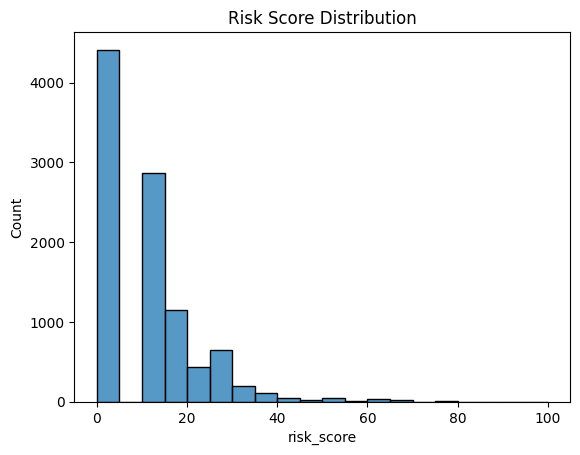

In [8]:
sns.histplot(df['risk_score'], bins=20)
plt.title("Risk Score Distribution")
plt.show()

In [9]:
pd.crosstab(df['Category'], df['Risk_Incident'], normalize='index')

Risk_Incident,0,1
Category,,
Inventory,0.859906,0.140094
Marketing,0.850746,0.149254
Operations,0.855483,0.144517
Payroll,0.862592,0.137408
Sales,0.847540,0.152460


In [10]:
df.sort_values("risk_score", ascending=False).head(100).to_csv("audit_exceptions_top100.csv", index=False)

In [11]:
top100 = df.sort_values("risk_score", ascending=False).head(100)

top100.head()

,Transaction_ID,Date,Account_Number,Transaction_Type,Amount,Currency,Counterparty,Category,Payment_Method,Risk_Incident,...,Login_Frequency,Failed_Attempts,IP_Region,flag_high_amount_p95,flag_extreme_amount_p99,flag_high_failed_attempts,flag_high_latency,flag_high_login_freq,flag_refund,risk_score
8049,TXN08050,2024-03-29,359854,Refund,9987.42,USD,Jones Group,Operations,Bank Transfer,0,...,10,5,LB,True,True,True,True,True,True,100
3629,TXN03630,2024-12-26,902834,Refund,9923.27,USD,Tucker-Maynard,Payroll,Bank Transfer,0,...,7,4,LT,True,True,False,True,False,True,75
5205,TXN05206,2024-02-29,395747,Refund,9927.06,USD,Alexander-Taylor,Inventory,Bank Transfer,0,...,1,5,AO,True,True,True,False,False,True,75
1243,TXN01244,2024-12-29,617152,Refund,9920.21,USD,Mercado LLC,Marketing,Cash,0,...,6,5,SV,True,True,True,False,False,True,75
5364,TXN05365,2024-10-19,227429,Refund,9973.05,USD,Woodard PLC,Operations,Credit Card,0,...,6,5,YE,True,True,True,False,False,True,75


In [12]:
top100.to_csv("audit_exceptions_top100.csv", index=False)

In [13]:
overall_rate = df['Risk_Incident'].mean()
top100_rate = top100['Risk_Incident'].mean()

overall_rate, top100_rate

(np.float64(0.1448), np.float64(0.12))

## 4. Risk Driver Analysis

To refine the risk scoring framework, statistical comparison was performed between transactions flagged as risk incidents and those not flagged.

The objective was to identify behavioral and financial characteristics that materially differentiate higher-risk transactions.

In [14]:
df.groupby('Risk_Incident')[[
    'Amount',
    'Failed_Attempts',
    'Login_Frequency',
    'System_Latency'
]].mean()

,Amount,Failed_Attempts,Login_Frequency,System_Latency
Risk_Incident,,,,
0,4973.369058,2.489827,5.522568,301.235007
1,5079.592120,2.497238,5.330110,299.461188


### Observations

Differences between incident and non-incident transactions are present but modest across the evaluated indicators.

Transaction amount shows a slight increase for incident cases, while behavioral indicators demonstrate limited separation at the mean level.

This suggests that individual features alone may not strongly differentiate risk, reinforcing the need for combined rule-based scoring logic.

## 5. Enhanced Risk Scoring Framework (v2)

Based on observed behavioral risk patterns, the risk scoring model was adjusted to place greater weight on system and user activity indicators rather than purely transaction size.

This aligns the scoring logic more closely with empirical risk drivers.

In [15]:
df['risk_score_v2'] = (
      df['flag_high_failed_attempts'] * 30
    + df['flag_high_login_freq'] * 25
    + df['flag_high_latency'] * 20
    + df['flag_extreme_amount_p99'] * 15
    + df['flag_high_amount_p95'] * 10
    + df['flag_refund'] * 5
)

In [16]:
top100_v2 = df.sort_values("risk_score_v2", ascending=False).head(100)

overall_rate = df['Risk_Incident'].mean()
top100_v2_rate = top100_v2['Risk_Incident'].mean()

overall_rate, top100_v2_rate

(np.float64(0.1448), np.float64(0.15))

### Risk Prioritization Effectiveness (v2)

- Overall population incident rate: 14.48%
- Top 100 (v2) incident rate: 15.00%

The enhanced scoring framework demonstrates measurable improvement in incident concentration within the prioritized segment.

This suggests that behavioral risk indicators (failed attempts, login frequency, system latency) provide incremental predictive signal beyond transaction size alone.

Although the lift is moderate, the approach demonstrates data-driven refinement of audit prioritization logic.

In [17]:
total_transactions = len(df)
total_incidents = df['Risk_Incident'].sum()

top100_incidents = top100_v2['Risk_Incident'].sum()

reduction_pct = 100 * (1 - (100 / total_transactions))

total_transactions, total_incidents, top100_incidents, reduction_pct

(10000, np.int64(1448), np.int64(15), 99.0)

### Business Impact Interpretation

- Total transactions analyzed: 10,000  
- Total incidents observed: 1,448  
- Incidents captured within top 100 prioritized transactions: 15  
- Manual review scope reduced by approximately 99% relative to full-population testing.

Although the concentration lift is modest, the framework demonstrates structured risk-based filtering that narrows review scope from full-population testing to targeted high-risk segments.

In large-scale fintech environments, this structured prioritization supports scalable continuous monitoring while preserving alignment with audit risk assessment principles.

The analysis also highlights that isolated transactional and behavioral indicators alone may not fully capture incident risk, reinforcing the importance of broader contextual data integration in production audit systems.

## Risk Score Distribution (v2)

To better understand population segmentation, the distribution of the enhanced risk score was evaluated.

This visualization illustrates how transactions are distributed across low, moderate, and high-risk bands.

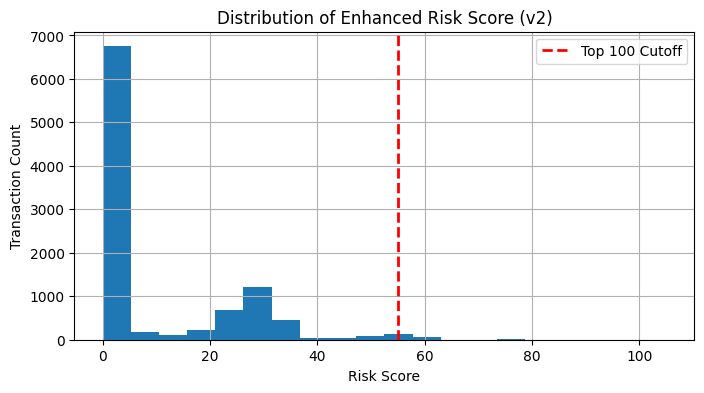

In [18]:
import matplotlib.pyplot as plt

threshold_score = top100_v2['risk_score_v2'].min()

plt.figure(figsize=(8,4))
df['risk_score_v2'].hist(bins=20)

plt.axvline(threshold_score,
            color='red',
            linestyle='--',
            linewidth=2,
            label="Top 100 Cutoff")

plt.title("Distribution of Enhanced Risk Score (v2)")
plt.xlabel("Risk Score")
plt.ylabel("Transaction Count")

plt.legend()
plt.show()

### Interpretation

The distribution demonstrates strong concentration of transactions within lower risk bands, with progressively fewer observations in higher score segments.

The highlighted cutoff visually isolates the Top 100 prioritized transactions, representing a small but targeted subset of the population.

This structured segmentation supports defensible risk-based sampling, improves audit efficiency, and enables transparent prioritization without reliance on opaque models.

## 6. Model-Assisted Risk Validation

To supplement the rule-based audit scoring framework, a logistic regression model was implemented to evaluate whether behavioral and transaction indicators statistically predict risk incidents.

The objective is not to replace audit logic with a black-box model, but to validate whether measurable predictive signal exists within the available features.

The model remains fully interpretable to preserve audit transparency.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

features = [
    'Amount',
    'Failed_Attempts',
    'Login_Frequency',
    'System_Latency'
]

X = df[features]
y = df['Risk_Incident']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)[:,1]

roc_auc_score(y_test, probs)

np.float64(0.5242149932807916)

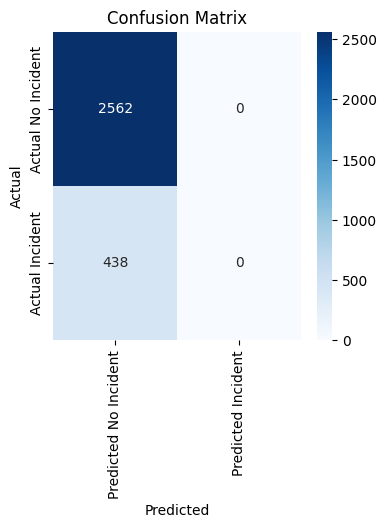

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert probabilities to binary predictions
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Predicted No Incident", "Predicted Incident"],
            yticklabels=["Actual No Incident", "Actual Incident"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

### Model Evaluation

The ROC-AUC score of approximately 0.52 indicates limited predictive power within the selected features.

This suggests that while behavioral and transaction indicators provide marginal signal, they do not strongly differentiate incident from non-incident transactions in isolation.

This outcome highlights an important audit insight:

Effective risk identification often requires broader contextual, control, and historical data rather than relying solely on isolated transaction attributes.

Accordingly, rule-based audit logic remains a critical complement to model-assisted validation.

## 7. Continuous Monitoring Capability

Beyond one-time audit testing, the framework supports ongoing risk monitoring through time-based analysis.

Monthly incident trends were evaluated to assess volatility and emerging concentrations.

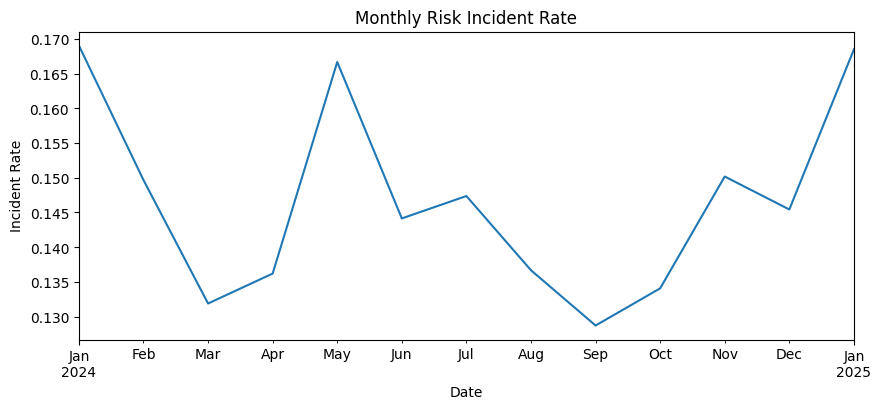

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

monthly = df.groupby(df['Date'].dt.to_period('M'))['Risk_Incident'].mean()

monthly.plot(figsize=(10,4))
plt.title("Monthly Risk Incident Rate")
plt.ylabel("Incident Rate")
plt.show()

### Monitoring Interpretation

Monthly incident rate fluctuations indicate variability across periods, reinforcing the value of recurring automated review rather than one-time testing.

In production environments, threshold-based alerts could be configured to trigger enhanced review when incident concentration exceeds baseline levels.

### Limitations 

While the enhanced scoring framework demonstrates prioritization capability, several limitations should be noted:

- The dataset contains limited behavioral and contextual features, constraining predictive power.
- The observed model lift (AUC ≈ 0.52) indicates modest incremental signal beyond baseline risk concentration.
- Incident labels may represent control-triggered events rather than confirmed fraud outcomes.

### Implementation Architecture

The framework can be integrated within an internal audit data pipeline as follows:

1. Transaction and system logs are ingested from operational databases.
2. Automated validation and risk-scoring scripts are executed on a scheduled basis.
3. Prioritized exception outputs are exported to audit workpaper systems.
4. Monitoring dashboards provide continuous visibility into risk concentration trends.

This architecture supports scalable, recurring audit analytics without disrupting core operational systems

### Future Enhancements

Future enhancements may include:

- Incorporation of historical behavioral baselines at the user and account level.
- Time-series anomaly detection for pattern shifts.
- Integration of external risk signals (device fingerprinting, geo-risk scoring).
- Deployment within automated recurring audit monitoring pipelines

## Final Executive Conclusion

This Audit Analytics Workbench demonstrates how analytics can enhance traditional audit methodology through structured, full-population transaction screening.

The framework incorporates:

- Data quality validation prior to testing
- Rule-based audit procedures aligned with risk-based sampling principles
- Behavioral risk scoring refinement based on empirical observation
- Model-assisted validation using interpretable logistic regression
- Continuous monitoring capability through time-based incident analysis

Although predictive lift was modest (ROC-AUC ≈ 0.52), the results are consistent with earlier findings that behavioral indicators provide incremental — but not dominant — predictive signal.

This project illustrates how analytics augments — rather than replaces — professional audit judgment.